In [1]:
#Importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

import ydata_profiling as pro

In [2]:
#Reading the dataset
data = pd.read_csv("bank-additional-full.csv")
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# **Data Defination**
1. age (numeric)

2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5. default: has credit in default? (categorical: 'no','yes','unknown')

6. housing: has housing loan? (categorical: 'no','yes','unknown')

7. loan: has personal loan? (categorical: 'no','yes','unknown')

8. contact: contact communication type (categorical: 'cellular','telephone')

9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10. dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

21. y - has the client subscribed a term deposit? (binary: 'yes','no')





In [ ]:
#Information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Description for attributes
descriptive_stats = data.describe()
print(descriptive_stats)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [ ]:
# Get the number of data points and number of descriptive features
num_data_points = data.shape[0]
num_features = data.shape[1]
print(f"Number of data points: {num_data_points}")
print(f"Number of features: {num_features}")

Number of data points: 41188
Number of features: 21


In [ ]:
# Get the type of each feature in the dataset
feature_types = data.dtypes
print(f"Feature types: {feature_types}")

Feature types: age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
#Initializing target feature
target_feature = 'y'
target_feature_type = data[target_feature].dtype
print(f"Target feature: {target_feature}")
print(f"Target feature type: {target_feature_type}")

Target feature: y
Target feature type: object


In [ ]:
grouped_df = data.groupby('y')

descriptive_stats_by_group = grouped_df.describe()
print(descriptive_stats_by_group)

         age                                                     duration  \
       count       mean        std   min   25%   50%   75%   max    count   
y                                                                           
no   36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0  36548.0   
yes   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0   4640.0   

                 ... euribor3m        nr.employed                          \
           mean  ...       75%    max       count         mean        std   
y                ...                                                        
no   220.844807  ...     4.962  5.045     36548.0  5176.166600  64.571979   
yes  553.191164  ...     4.406  5.045      4640.0  5095.115991  87.572641   

                                             
        min     25%     50%     75%     max  
y                                            
no   4963.6  5099.1  5195.8  5228.1  5228.1  
yes  4963.6  5017.5  5099.1  5191.0  5228.1 

In [ ]:
#Checking null values.
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

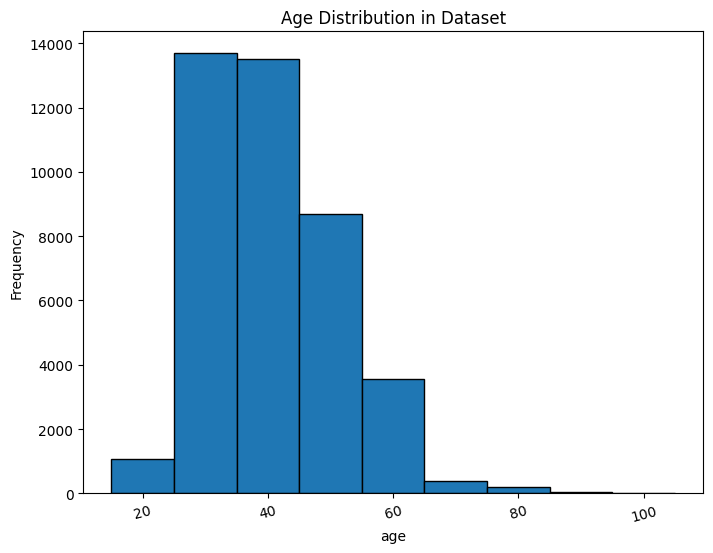

In [ ]:
#age distribution
plt.figure(figsize=(8,6))
#sns.countplot(x='age', data=df)
bins = [15, 25, 35, 45, 55,65,75,85,95,105]
plt.hist(data['age'], bins=bins, edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Dataset')

plt.xticks(rotation=15)
plt.show()


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

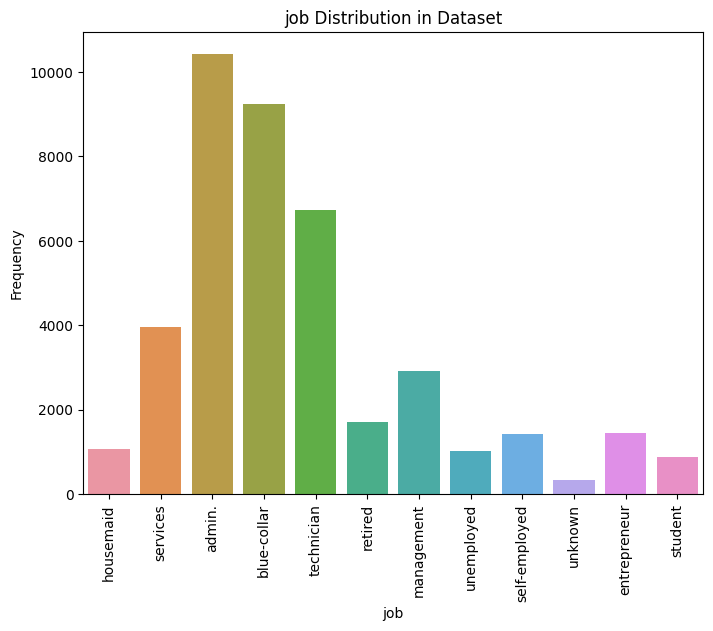

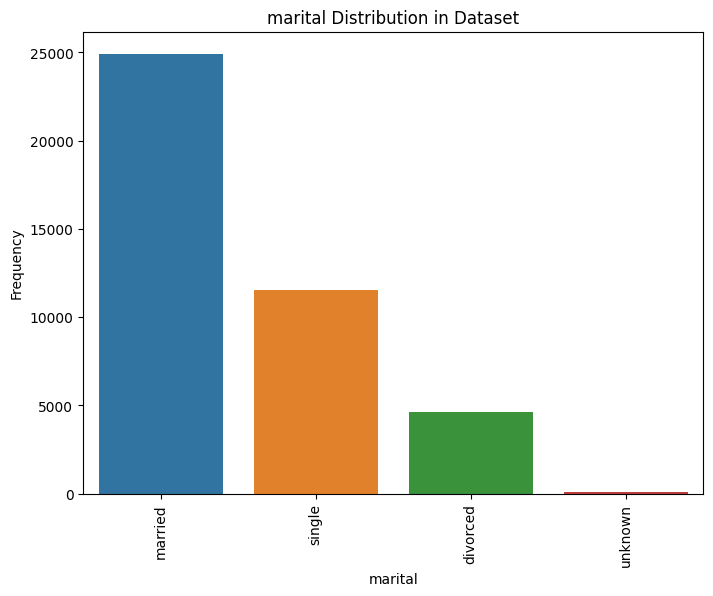

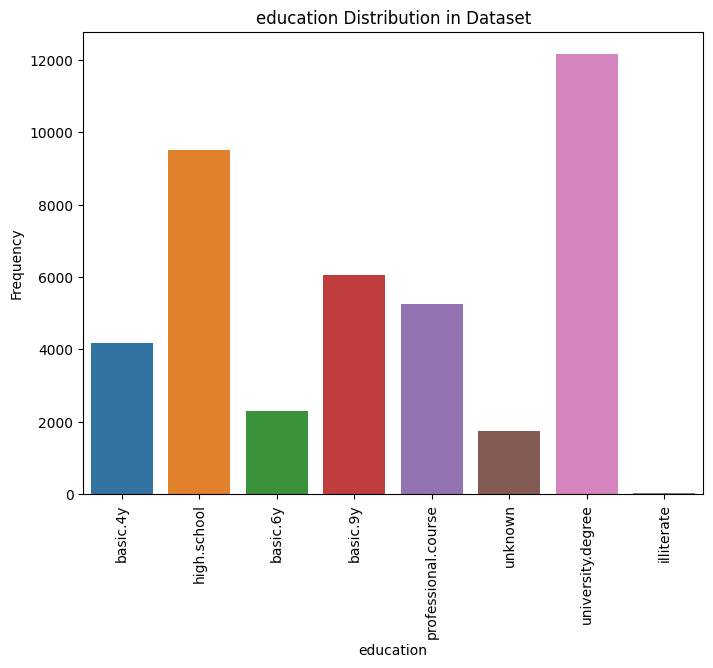

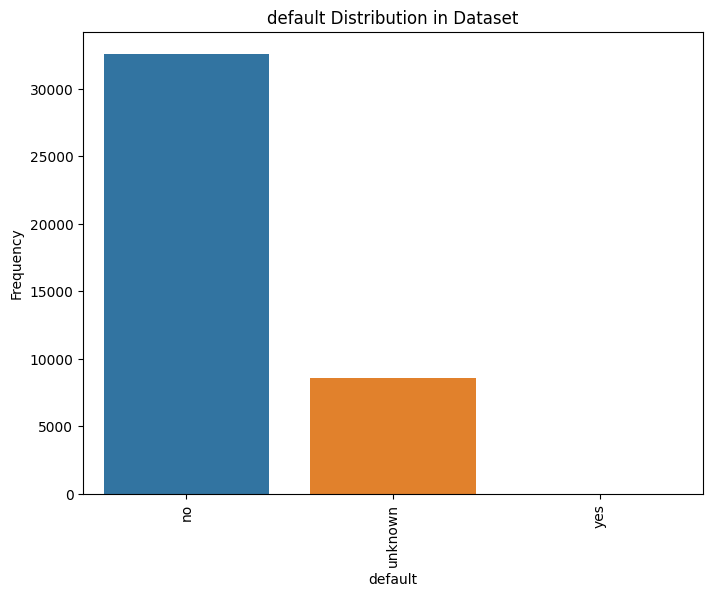

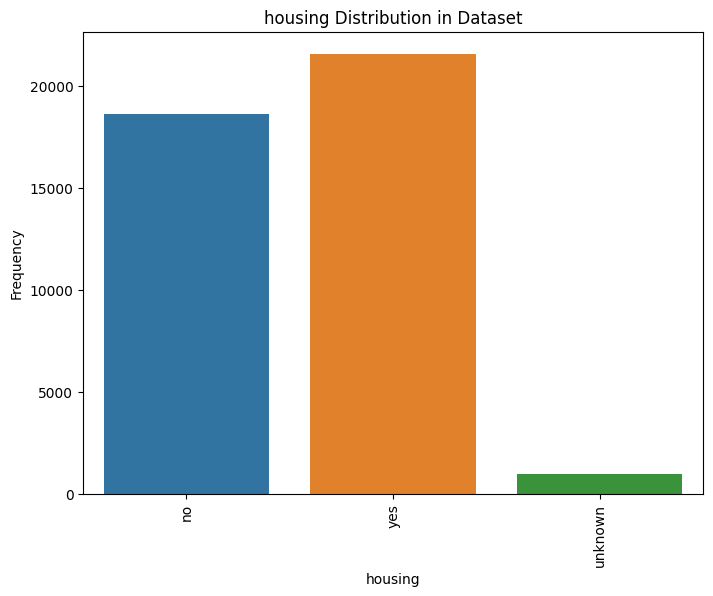

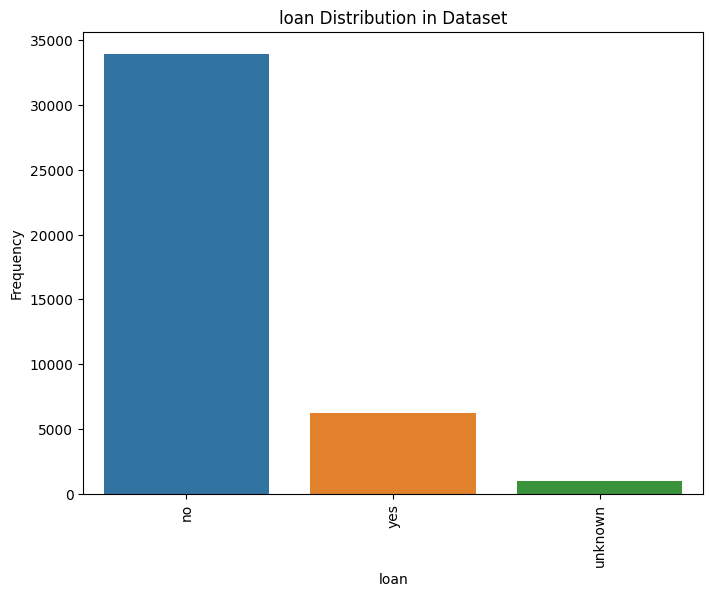

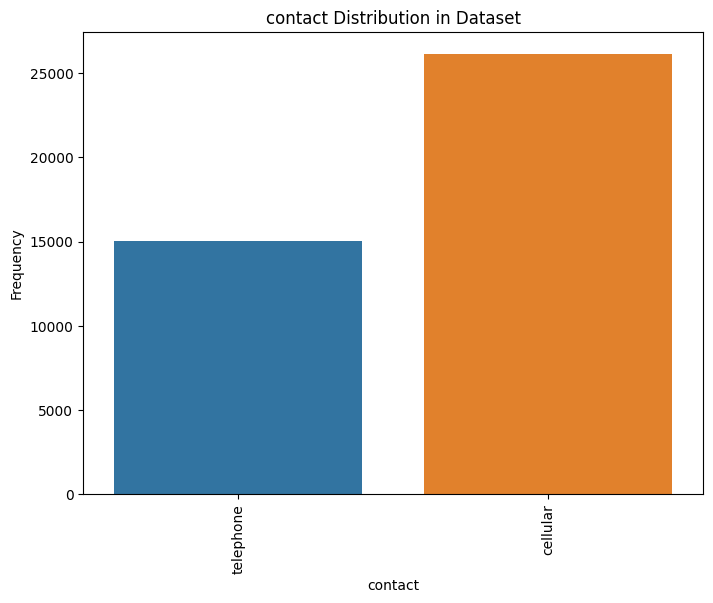

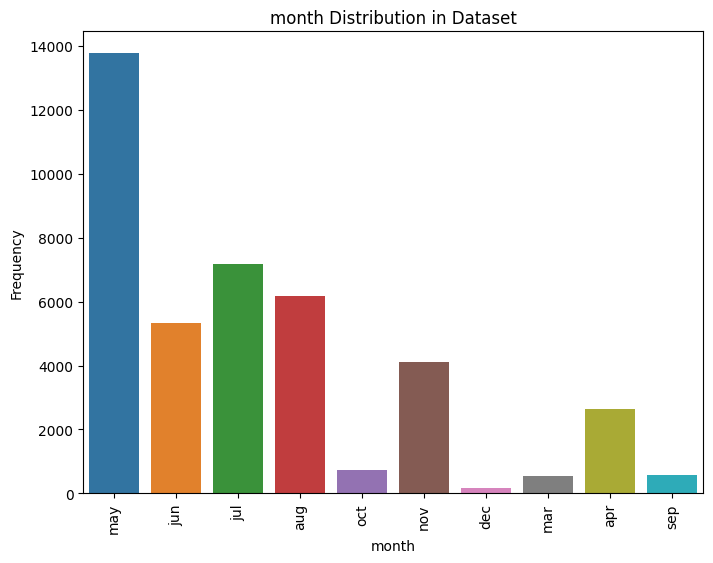

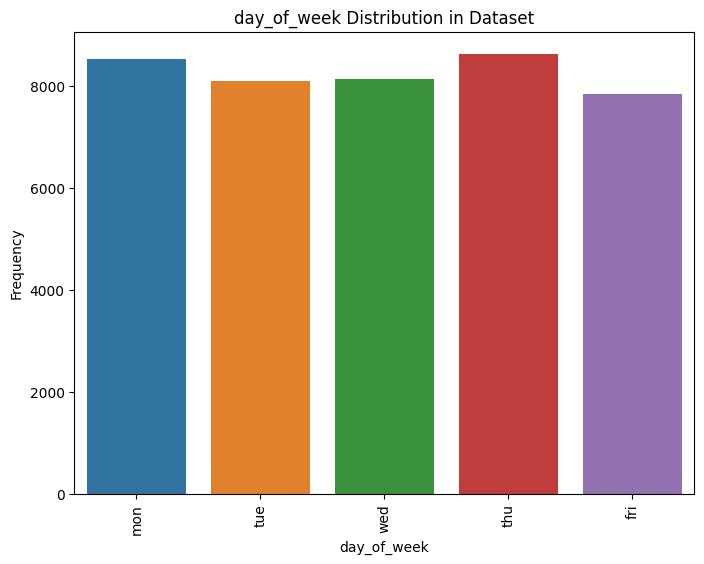

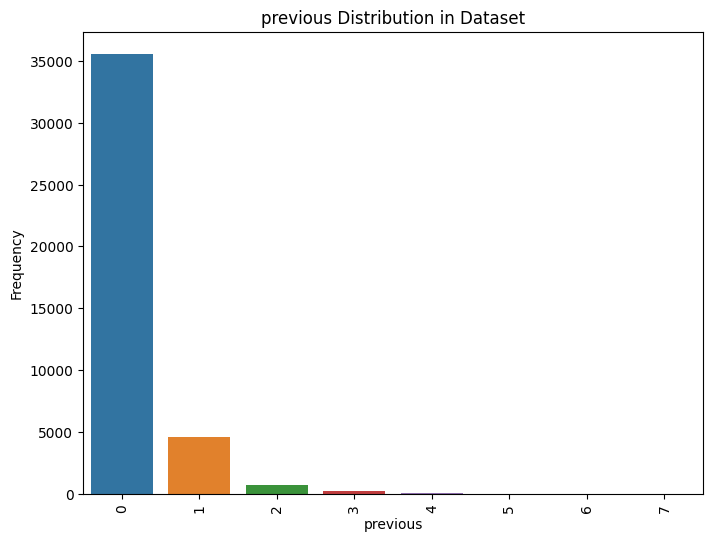

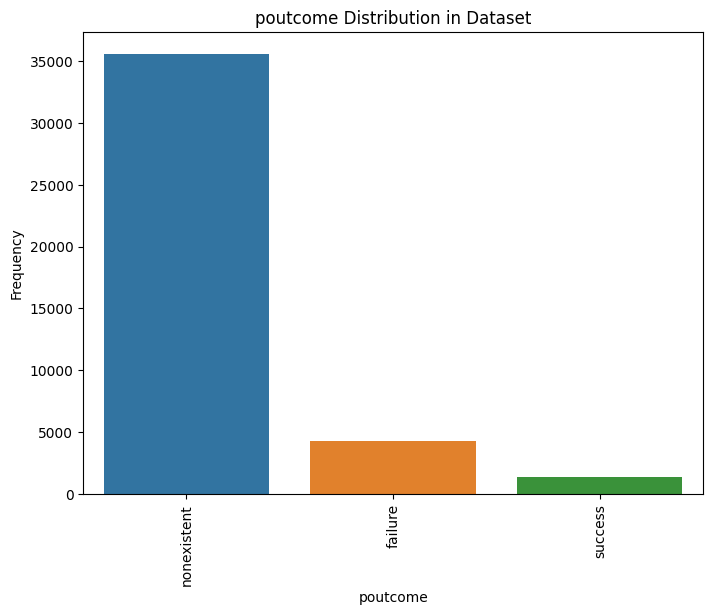

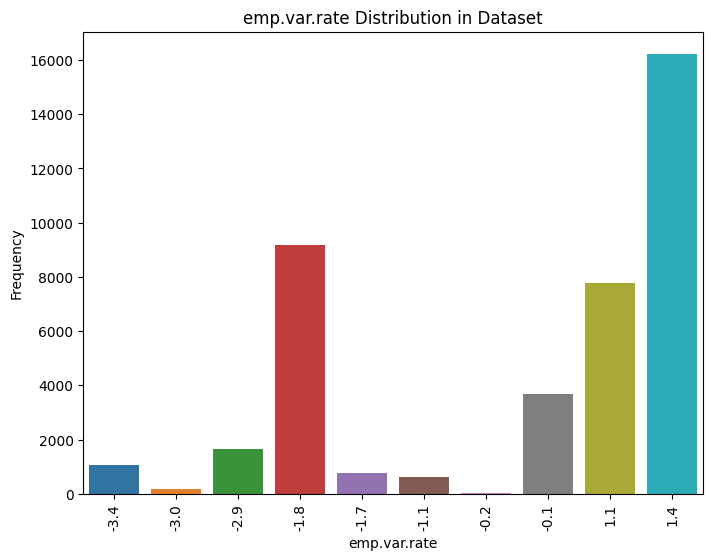

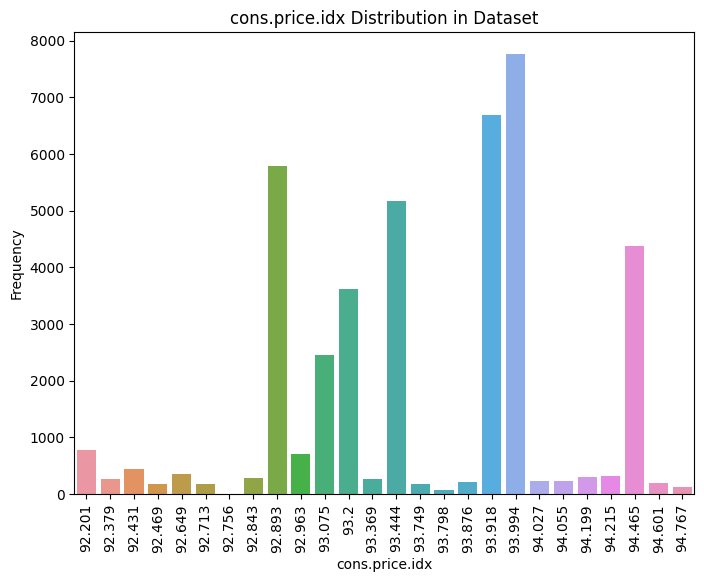

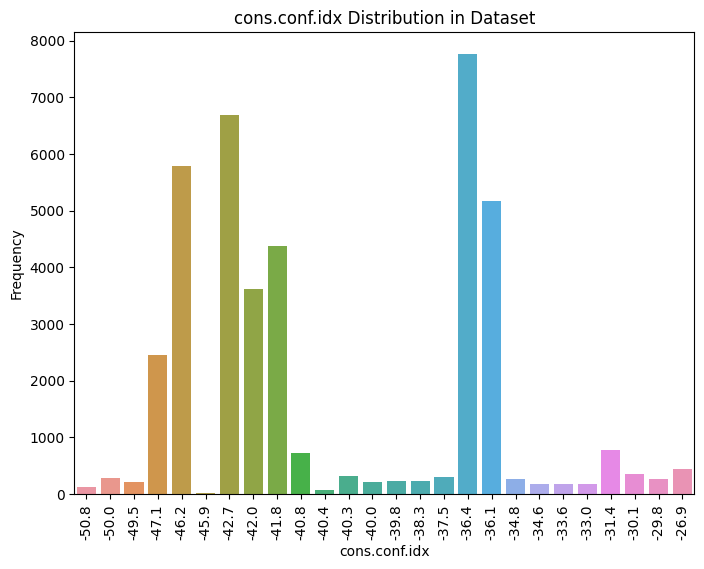

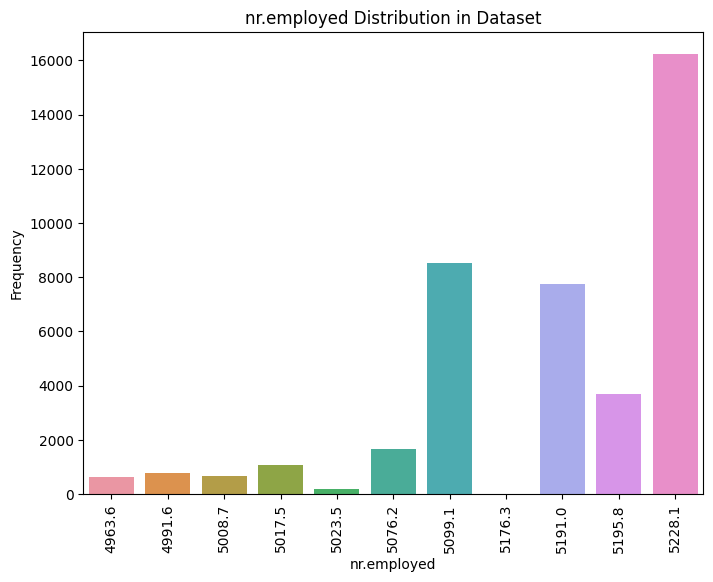

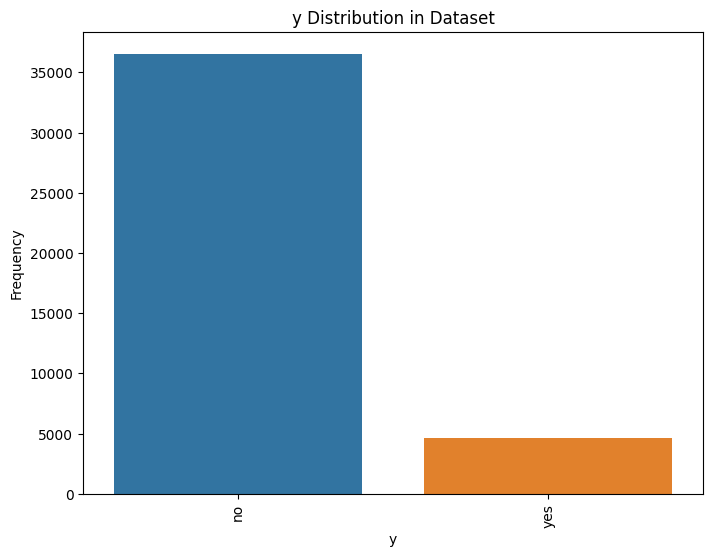

In [ ]:
#Distributions and visalizations of attributes
datafeature=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx','nr.employed', 'y']
for i in datafeature:
  df = data.dropna(subset=[i])
  plt.figure(figsize=(8,6))
  sns.countplot(x=i, data=df)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(i+' Distribution in Dataset')
  plt.xticks(rotation=90)
  plt.show()

#Scroll to see all the visualizations

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=6ead6ecf63f8d545bcacde3aea8011f8e0daccd90249ff95a9f9ed0fb17db176
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [ ]:
!pip install --upgrade typing-extensions

In [ ]:
pip install --upgrade pandas ydata_profiling numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.

In [ ]:
#Creating a profile report of the dataframe to go through all the statistics of the dataset
pro.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Model Fitting and Treating Imbalanced Data**

Now, we will create our model and run the following Machine Learning algorithms -


1.   Logistic Regression Model
2.   Decison Tree
1.   Random Forest
2.  Support Vector Machine

In [3]:
predictors = data.iloc[:,0:20]
predictors = predictors.drop(['pdays'],axis=1)
y = data.iloc[:,20]
X = pd.get_dummies(predictors)
print(X)
print(y)

       age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0       56       261         1         0           1.1          93.994   
1       57       149         1         0           1.1          93.994   
2       37       226         1         0           1.1          93.994   
3       40       151         1         0           1.1          93.994   
4       56       307         1         0           1.1          93.994   
...    ...       ...       ...       ...           ...             ...   
41183   73       334         1         0          -1.1          94.767   
41184   46       383         1         0          -1.1          94.767   
41185   56       189         2         0          -1.1          94.767   
41186   44       442         1         0          -1.1          94.767   
41187   74       239         3         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  job_admin.  ...  month_oct  \
0              -36.4      4.857    

***Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.***

In [ ]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

This mismatch must be addressed so that modelling is not biased. Imbalance is typically addressed in three ways.


1.   RANDOM UNDRSAMPLING
1.   RANDOM OVERSAMPLING
2.   SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE (SMOTE)





**A) Random Undersampling**

The majority group, in this case the 'no' category, is randomly sampled to match the size of the minority 'yes' category in this manner. The majority category's remaining data is discarded.

In [4]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mont

In [ ]:
rus = RandomUnderSampler(random_state=0)

X_Usampled, y_Usampled = rus.fit_resample(X, y)

pd.Series(y_Usampled).value_counts()

no     4640
yes    4640
Name: y, dtype: int64

**B) Random Oversampling**

The minority group 'no' is randomly sampled with replacement to match the size of the majority 'no' category in this method. Entries in the minority category will be repeated several times.

In [ ]:
ros = RandomOverSampler(random_state=0)

X_Osampled, y_Osampled = ros.fit_resample(X, y)

pd.Series(y_Osampled).value_counts()

no     36548
yes    36548
Name: y, dtype: int64

**C) SMOTE - Synthetic Minority Oversampling Technique**

This is an oversampling strategy in which, rather than randomly repeating the minority 'yes' category, new entires are sythetically constructed while preserving the convexity of the minority entry space. The minority category samples will once again match the majority category samples.

In [ ]:
sm = SMOTE(random_state=0)

X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

pd.Series(y_SMOTE).value_counts()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c715b74edd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


no     36548
yes    36548
Name: y, dtype: int64

***These different imbalance treatements will be used in different data modeling techniques based on the need.***

In [ ]:
# building X_Test, Y_Test, X_Train, Y_Train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

***Now that our data is ready, we can develop our model and test its performance. Because this is a classification problem, I'll use the Logistic Regression model.***

# **1. Logistic Regression Model**

In [ ]:
# Imbalanced Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]

y_test = label_binarize(y_test,classes=['no','yes'])
fpr_imb, tpr_imb, _ = roc_curve(y_test, y_pred)
roc_auc_imb = auc(fpr_imb, tpr_imb)

y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Imbalanced Data -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

Imbalanced Data -
Precision:  0.68 Recall:  0.41
Accuracy:  90.85 %


In [ ]:
# Undersampled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X_train, y_train)

model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_Usampled,y_Usampled)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]

y_test = label_binarize(y_test,classes=['no','yes'])
fpr_us, tpr_us, _ = roc_curve(y_test, y_pred)
roc_auc_us = auc(fpr_us, tpr_us)

y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Random undersampled Data -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

Random undersampled Data -
Precision:  0.45 Recall:  0.87
Accuracy:  86.23 %


In [ ]:
# Oversampled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X_train, y_train)

model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_Osampled, y_Osampled)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]

y_test = label_binarize(y_test,classes=['no','yes'])
fpr_os, tpr_os, _ = roc_curve(y_test, y_pred)
roc_auc_os = auc(fpr_os, tpr_os)

y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Random oversampled Data -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

Random oversampled Data -
Precision:  0.42 Recall:  0.87
Accuracy:  85.13 %


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_SMOTE, y_SMOTE)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]

y_test = label_binarize(y_test,classes=['no','yes'])
fpr_os, tpr_os, _ = roc_curve(y_test, y_pred)
roc_auc_os = auc(fpr_os, tpr_os)

y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Random oversampled Data -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

Random oversampled Data -
Precision:  0.68 Recall:  0.44
Accuracy:  90.97 %


On the validation dataset, we obtained an accuracy score of roughly 85% for both undersampled and oversampled data. The decision boundary of logistic regression is linear.

What if our data is not linear? We require a model that can account for this nonlinearity. Dealing with non-linearity using the Decision Tree algorithm

The ROC curve displays the relationship between the True Positive Rate and the False Positive Rate. The area under the ROC curve for oversampled data is slightly higher than for unbalanced and undersampled data.

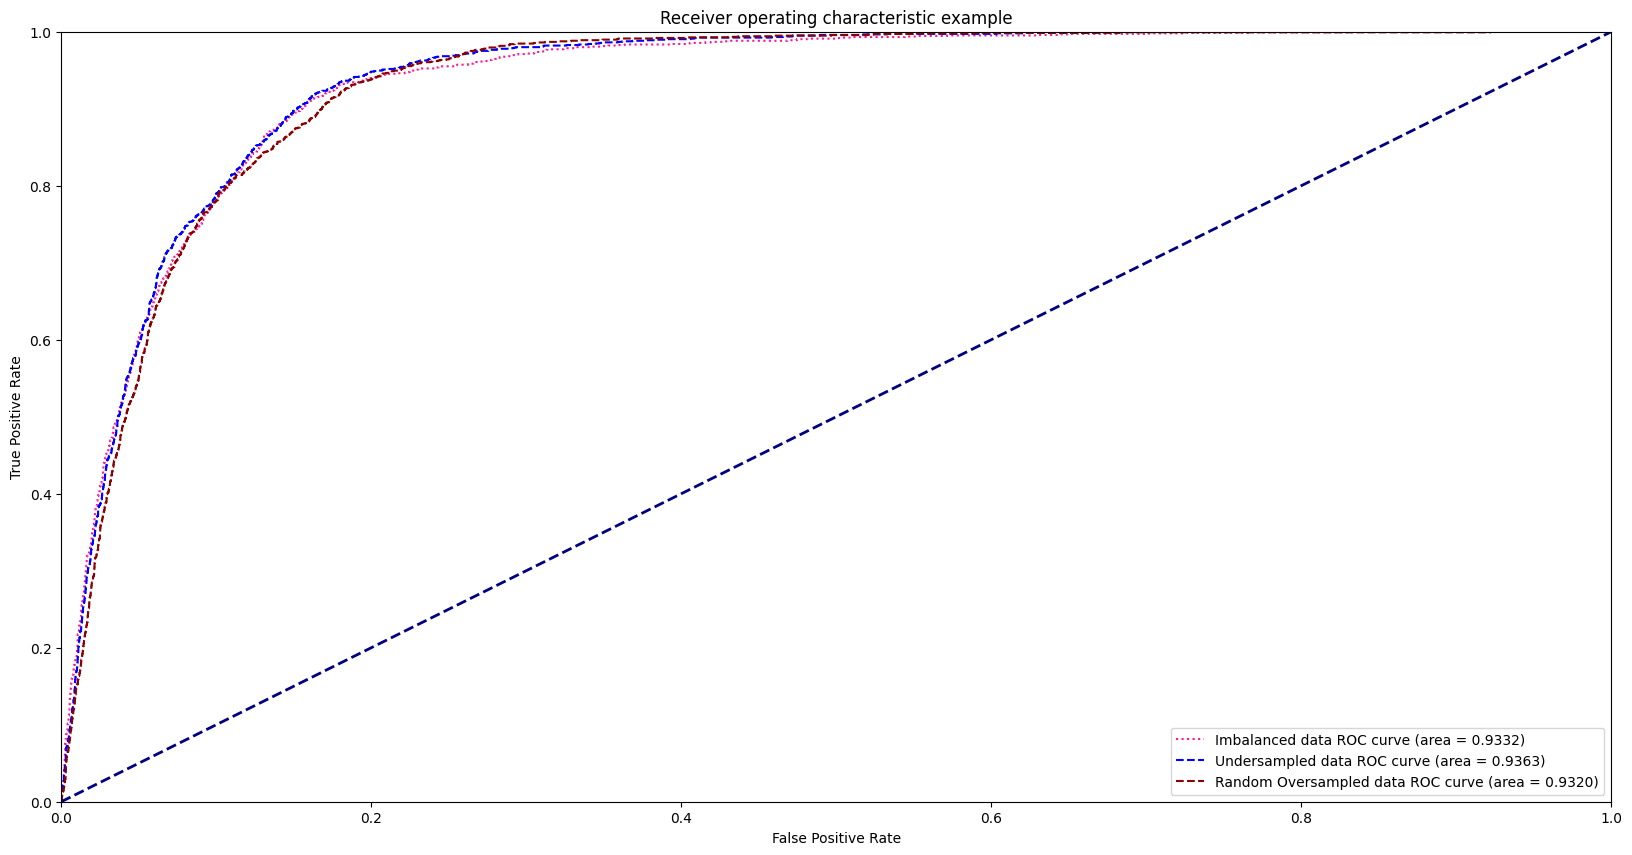

In [ ]:
# Calculating ROC Curves
plt.figure(figsize=(20,10))
lw = 2
plt.plot(fpr_imb, tpr_imb,
         label='Imbalanced data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_imb),
         color='deeppink', linestyle=':')

plt.plot(fpr_us, tpr_us,
         label='Undersampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_us),
         color='blue', linestyle='--')

plt.plot(fpr_os, tpr_os,
         label='Random Oversampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_os),
         color='darkred', linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

# **2. Decision Tree Model**
Decision tree is another simple yet powerful classification tool. But this model faces the same problem of bad precision score and bad recall score for imbalanced data.

In [ ]:
# Creating train and Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=0)

model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)

y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

In [ ]:
# Calculating the accuracy
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy For Decision Tree Model is:",round(accuracy_score(y_test, y_pred)*100,2), "%")

Precision:  0.64 Recall:  0.55
Accuracy For Decision Tree Model is: 91.66 %


***When decision tree is fit on SMOTE data, recall score improves but precision score deteriorates.***

In [ ]:
# Training Model on SMOTE Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

# SMOTE Data
model = tree.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)

y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Precision: ", round(precision_score(y_test,y_pred),2),"Recall: ", round(recall_score(y_test,y_pred),2))
print("Accuracy for Decision Tree Model is ",round(accuracy_score(y_pred,y_test)*100,2),"%")

Precision:  0.46 Recall:  0.78
Accuracy for Decision Tree Model is  87.21 %


# 3. **Random Forest Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
model = forest.fit(X_train,y_train)

y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()

y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy for Random Forest Model is ",round(accuracy_score(y_pred,y_test)*100,2),"%")

Precision:  0.29 Recall:  0.71
Accuracy for Random Forest Model is  78.02 %


***Random forest classification hardly performs better when applied on SMOTE data in terms of precision and recall.***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

model = forest.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()

y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy for Random Forest Model is ",round(accuracy_score(y_pred,y_test)*100,2),"%")

Precision:  0.34 Recall:  0.68
Accuracy for Random Forest Model is  81.57 %


# 4. Support Vector Machine Model

# Support Vector Machine with Unbalanced Data using Linear Kernal

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = SVC(kernel='linear')
model = svm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Linear kernel- ","Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

# ROC Curve
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred)
roc_auc_linear = auc(fpr_linear, tpr_linear)

Linear kernel-  Precision:  0.4 Recall:  0.46
Accuracy:  86.25 %


# Support Vector Machine with SMOTE using Linear Kernal

In [ ]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2)

svm = SVC(kernel='linear')
model = svm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

print("Linear kernel- ","Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

# ROC Curve
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred)
roc_auc_linear = auc(fpr_linear, tpr_linear)

Linear kernel-  Precision:  0.84 Recall:  0.94
Accuracy:  88.3 %


# 5. Naive Bayes Algorithm

# Naive Bayes Method with Imbalanced Data

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Convert y to 'no' and 'yes' for demonstration


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y = np.where(y == 0, 'no', 'yes')

# Initialize the Bernoulli Naive Bayes model
model = BernoulliNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)



Accuracy: 0.8347899975722263
Confusion Matrix:
[[6472  831]
 [ 530  405]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.89      0.90      7303
         yes       0.33      0.43      0.37       935

    accuracy                           0.83      8238
   macro avg       0.63      0.66      0.64      8238
weighted avg       0.86      0.83      0.84      8238



# Naive Bayes Algorithm with Undersampled Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X_train, y_train)

# Initialize the Bernoulli Naive Bayes model
model = BernoulliNB()

# Train the model
model.fit(X_Usampled, y_Usampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7105284454155539
Confusion Matrix:
[[7813 3097]
 [ 480  967]]
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.72      0.81     10910
         yes       0.24      0.67      0.35      1447

    accuracy                           0.71     12357
   macro avg       0.59      0.69      0.58     12357
weighted avg       0.86      0.71      0.76     12357



# Naive Bayes Algorithm with Oversampled Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X_train, y_train)

model = BernoulliNB()

# Train the model
model.fit(X_Osampled, y_Osampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7165978797442745
Confusion Matrix:
[[7890 3070]
 [ 432  965]]
Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.72      0.82     10960
         yes       0.24      0.69      0.36      1397

    accuracy                           0.72     12357
   macro avg       0.59      0.71      0.59     12357
weighted avg       0.87      0.72      0.77     12357



# Naive Bayes Algorithm with SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

model = BernoulliNB()

# Train the model
model.fit(X_SMOTE, y_SMOTE)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8619406004693696
Confusion Matrix:
[[10074   879]
 [  827   577]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.92      0.92     10953
         yes       0.40      0.41      0.40      1404

    accuracy                           0.86     12357
   macro avg       0.66      0.67      0.66     12357
weighted avg       0.86      0.86      0.86     12357



# 6. Neural Network

# Neural Network Algorithm with Imbalanced Data

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert string labels to numerical format
y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)

# Build and compile the neural network model
model = Sequential()
model.add(Dense(64, input_dim=62, activation='relu'))  # Adjust input_dim based on your actual feature dimension
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)






Epoch 1/10
824/824 - 3s - loss: 1.7057 - accuracy: 0.8527 - val_loss: 0.5436 - val_accuracy: 0.8897 - 3s/epoch - 4ms/step
Epoch 2/10
824/824 - 2s - loss: 1.0799 - accuracy: 0.8667 - val_loss: 0.3043 - val_accuracy: 0.9006 - 2s/epoch - 2ms/step
Epoch 3/10
824/824 - 2s - loss: 0.8691 - accuracy: 0.8665 - val_loss: 0.4401 - val_accuracy: 0.8807 - 2s/epoch - 2ms/step
Epoch 4/10
824/824 - 2s - loss: 0.7346 - accuracy: 0.8747 - val_loss: 0.4527 - val_accuracy: 0.8967 - 2s/epoch - 2ms/step
Epoch 5/10
824/824 - 2s - loss: 0.5685 - accuracy: 0.8823 - val_loss: 0.9446 - val_accuracy: 0.8910 - 2s/epoch - 2ms/step
Epoch 6/10
824/824 - 2s - loss: 0.6097 - accuracy: 0.8788 - val_loss: 0.6951 - val_accuracy: 0.8024 - 2s/epoch - 2ms/step
Epoch 7/10
824/824 - 2s - loss: 0.6945 - accuracy: 0.8762 - val_loss: 0.3141 - val_accuracy: 0.8976 - 2s/epoch - 3ms/step
Epoch 8/10
824/824 - 2s - loss: 0.4949 - accuracy: 0.8822 - val_loss: 0.2526 - val_accuracy: 0.8926 - 2s/epoch - 3ms/step
Epoch 9/10
824/824 - 2s 

# Neural Network Algorithm with SMOTE

In [ ]:
sm = SMOTE(random_state=0)
X_1, y_1 = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)

# Build and compile the neural network model
model = Sequential()
model.add(Dense(64, input_dim=62, activation='relu'))  # Adjust input_dim based on your actual feature dimension
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Epoch 1/10
1462/1462 - 8s - loss: 1.4008 - accuracy: 0.7985 - val_loss: 0.3234 - val_accuracy: 0.8896 - 8s/epoch - 5ms/step
Epoch 2/10
1462/1462 - 5s - loss: 0.4698 - accuracy: 0.8707 - val_loss: 0.2232 - val_accuracy: 0.9243 - 5s/epoch - 4ms/step
Epoch 3/10
1462/1462 - 3s - loss: 0.4032 - accuracy: 0.8919 - val_loss: 0.2460 - val_accuracy: 0.9254 - 3s/epoch - 2ms/step
Epoch 4/10
1462/1462 - 3s - loss: 0.4122 - accuracy: 0.8973 - val_loss: 0.3953 - val_accuracy: 0.8882 - 3s/epoch - 2ms/step
Epoch 5/10
1462/1462 - 3s - loss: 0.4151 - accuracy: 0.8976 - val_loss: 0.2241 - val_accuracy: 0.9358 - 3s/epoch - 2ms/step
Epoch 6/10
1462/1462 - 4s - loss: 0.3637 - accuracy: 0.9114 - val_loss: 0.1551 - val_accuracy: 0.9471 - 4s/epoch - 3ms/step
Epoch 7/10
1462/1462 - 5s - loss: 0.3696 - accuracy: 0.9099 - val_loss: 0.1572 - val_accuracy: 0.9460 - 5s/epoch - 3ms/step
Epoch 8/10
1462/1462 - 3s - loss: 0.3191 - accuracy: 0.9147 - val_loss: 0.2166 - val_accuracy: 0.9374 - 3s/epoch - 2ms/step
Epoch 9/

# 7. KNN

# KNN Algorithm with Imbalanced Data

In [ ]:
# Import libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8924496236950716
Confusion Matrix:
[[6935  368]
 [ 518  417]]

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7303
         yes       0.53      0.45      0.48       935

    accuracy                           0.89      8238
   macro avg       0.73      0.70      0.71      8238
weighted avg       0.89      0.89      0.89      8238



# KNN Algorithm with SMOTE

In [ ]:
sm = SMOTE(random_state=0)
X_1, y_1 = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9209986320109439
Confusion Matrix:
[[6291 1041]
 [ 114 7174]]

Classification Report:
              precision    recall  f1-score   support

          no       0.98      0.86      0.92      7332
         yes       0.87      0.98      0.93      7288

    accuracy                           0.92     14620
   macro avg       0.93      0.92      0.92     14620
weighted avg       0.93      0.92      0.92     14620



# 8. XGBoost

# XGBoost with Imbalanced Data

In [ ]:
# XGBoost imports
from xgboost import XGBClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)

# Instantiate xgboost model
xg_clf = XGBClassifier()

# Fit model on training data
xg_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xg_clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.916849
Confusion Matrix:
[[7030  273]
 [ 412  523]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.66      0.56      0.60       935

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



# XGBoost Model with SMOTE

In [ ]:
# XGBoost imports
from xgboost import XGBClassifier

sm = SMOTE(random_state=0)
X_1, y_1 = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)

# Instantiate xgboost model
xg_clf = XGBClassifier()

# Fit model on training data
xg_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xg_clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.950068
Confusion Matrix:
[[7043  289]
 [ 441 6847]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7332
           1       0.96      0.94      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



# Feature Importance

age: 0.006
duration: 0.041
campaign: 0.005
previous: 0.004
emp.var.rate: 0.027
cons.price.idx: 0.013
cons.conf.idx: 0.030
euribor3m: 0.010
nr.employed: 0.503
job_admin.: 0.005
job_blue-collar: 0.008
job_entrepreneur: 0.006
job_housemaid: 0.006
job_management: 0.007
job_retired: 0.006
job_self-employed: 0.008
job_services: 0.006
job_student: 0.006
job_technician: 0.007
job_unemployed: 0.006
job_unknown: 0.005
marital_divorced: 0.005
marital_married: 0.005
marital_single: 0.005
marital_unknown: 0.002
education_basic.4y: 0.007
education_basic.6y: 0.005
education_basic.9y: 0.007
education_high.school: 0.006
education_illiterate: 0.001
education_professional.course: 0.005
education_university.degree: 0.007
education_unknown: 0.004
default_no: 0.012
default_unknown: 0.003
default_yes: 0.000
housing_no: 0.004
housing_unknown: 0.006
housing_yes: 0.004
loan_no: 0.006
loan_unknown: 0.000
loan_yes: 0.005
contact_cellular: 0.011
contact_telephone: 0.000
month_apr: 0.008
month_aug: 0.007
month_dec:

Ellipsis

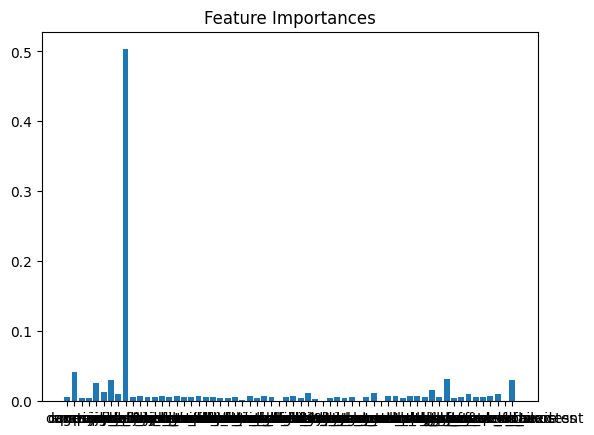

In [ ]:
# Define features
features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

# Train model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)

# Fit model on training data
xg_clf.fit(X_train, y_train)


# Get importances
importances = xg_clf.feature_importances_

# Print importances
for i, name in enumerate(features):
    print(f"{name}: {importances[i]:.3f}")

# Plot
plt.bar(features, importances)
plt.title("Feature Importances")
...

# Dropping Highly Correlated Columns

In [12]:
predictors = data.iloc[:,0:20]
predictors = predictors.drop(['pdays'],axis=1)
y = data.iloc[:,20]
X = pd.get_dummies(predictors)
X = X.drop(['emp.var.rate','euribor3m'], axis=1)

# Trying the XGBoost model on data without high correlation rows

In [11]:
# XGBoost imports
from xgboost import XGBClassifier

sm = SMOTE(random_state=0)
X_1, y_1 = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)

# Instantiate xgboost model
xg_clf = XGBClassifier()

# Fit model on training data
xg_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xg_clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.949932
Confusion Matrix:
[[7037  295]
 [ 437 6851]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7332
           1       0.96      0.94      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



# Trying the Neural Network model on data without high correlation rows

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

sm = SMOTE(random_state=0)
X_1, y_1 = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)


y_train = (y_train == 'yes').astype(int)
y_test = (y_test == 'yes').astype(int)



# Build and compile the neural network model
model = Sequential()
model.add(Dense(64, input_dim=60, activation='relu'))  # Adjust input_dim based on your actual feature dimension
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Epoch 1/10
1462/1462 - 5s - loss: 1.3260 - accuracy: 0.7824 - val_loss: 0.2105 - val_accuracy: 0.9286 - 5s/epoch - 3ms/step
Epoch 2/10
1462/1462 - 4s - loss: 0.6857 - accuracy: 0.8456 - val_loss: 1.1444 - val_accuracy: 0.8228 - 4s/epoch - 2ms/step
Epoch 3/10
1462/1462 - 3s - loss: 0.5796 - accuracy: 0.8756 - val_loss: 3.7147 - val_accuracy: 0.5679 - 3s/epoch - 2ms/step
Epoch 4/10
1462/1462 - 3s - loss: 0.7066 - accuracy: 0.8774 - val_loss: 0.1946 - val_accuracy: 0.9414 - 3s/epoch - 2ms/step
Epoch 5/10
1462/1462 - 3s - loss: 0.6124 - accuracy: 0.8852 - val_loss: 0.3812 - val_accuracy: 0.9064 - 3s/epoch - 2ms/step
Epoch 6/10
1462/1462 - 4s - loss: 0.5304 - accuracy: 0.8971 - val_loss: 0.2418 - val_accuracy: 0.9313 - 4s/epoch - 3ms/step
Epoch 7/10
1462/1462 - 3s - loss: 0.5066 - accuracy: 0.9019 - val_loss: 0.2289 - val_accuracy: 0.9435 - 3s/epoch - 2ms/step
Epoch 8/10
1462/1462 - 3s - loss: 0.3550 - accuracy: 0.9170 - val_loss: 2.3260 - val_accuracy: 0.6019 - 3s/epoch - 2ms/step
Epoch 9/

# **We can observe that the values of Accuracy, precision and recall remain almost same even after removing the highly correlated features, this means we are able to train a effective model with few less features and save computing power**

# **---- THE END -------**